In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

# Veriyi yükle
df = pd.read_csv('veri_encoded549.csv')

# Özellikler ve hedef değişken
y = df["Fiyat"].values
x = df.drop("Fiyat", axis=1).values

# Eğitim ve test verilerine ayır
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

# Veriyi ölçeklendir
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Modeli oluştur
model = Sequential()
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))

# Modeli derle
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

# Modeli eğit
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=50, epochs=300)


Epoch 1/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 1728806912000.0000 - mean_absolute_error: 1136098.5000 - mean_squared_error: 1728806780928.0000 - val_loss: 1813181235200.0000 - val_mean_absolute_error: 1171403.7500 - val_mean_squared_error: 1813181235200.0000
Epoch 2/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1566731141120.0000 - mean_absolute_error: 1080901.7500 - mean_squared_error: 1566731141120.0000 - val_loss: 1812898906112.0000 - val_mean_absolute_error: 1171283.1250 - val_mean_squared_error: 1812898906112.0000
Epoch 3/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1512558690304.0000 - mean_absolute_error: 1079926.3750 - mean_squared_error: 1512558690304.0000 - val_loss: 1808678780928.0000 - val_mean_absolute_error: 1169475.0000 - val_mean_squared_error: 1808678780928.0000
Epoch 4/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1592561238016.0000 - mean_absolute_error: 1092484.7500 - mean_squared_error: 1592561238016.0000 - val_loss: 1768395898880.0000

In [ ]:
from sklearn.metrics import r2_score

# Test verisi üzerinde tahmin yap
y_pred = model.predict(x_test)

# R² skorunu hesapla
r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2:.2f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² score: 0.95


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
tahminDizisi = model.predict(x_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
mean_absolute_error(y_test,tahminDizisi)

109556.75168678978

In [ ]:
df.describe()

,Yıl,Kilometre,Motor Hacmi,Motor Gücü,Fiyat,Vites Tipi_Düz,Vites Tipi_Otomatik,Vites Tipi_Yarı Otomatik,Yakıt Tipi_Benzin,Yakıt Tipi_Dizel,...,Model_320i Executive M Sport,Model_320i First Edition Luxury Line,Model_320i First Edition M Sport,Model_320i First Edition Sport Line,Model_320i M Sport,Model_320i Premium,Model_320i Sport Line,Model_325i Standart,Model_328i M Sport,Model_Diğer
count,1599.000000,1599.000000,1599.000000,1599.000000,1.599000e+03,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,...,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,2010.568480,202126.779237,1766.335835,156.687305,1.121122e+06,0.170732,0.828643,0.000625,0.523452,0.282051,...,0.002502,0.003127,0.018762,0.018136,0.011882,0.009381,0.008755,0.003127,0.002502,0.043777
std,7.694912,97796.390973,257.514150,27.501003,6.262129e+05,0.376392,0.376939,0.025008,0.499606,0.450139,...,0.049969,0.055849,0.135725,0.133486,0.108391,0.096430,0.093189,0.055849,0.049969,0.204663
min,1980.000000,40.000000,0.000000,0.000000,1.500000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,130000.000000,1597.000000,136.000000,6.800000e+05,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,195000.000000,1598.000000,170.000000,1.075000e+06,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,275000.000000,1995.000000,177.000000,1.367500e+06,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,550000.000000,2993.000000,306.000000,3.724000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


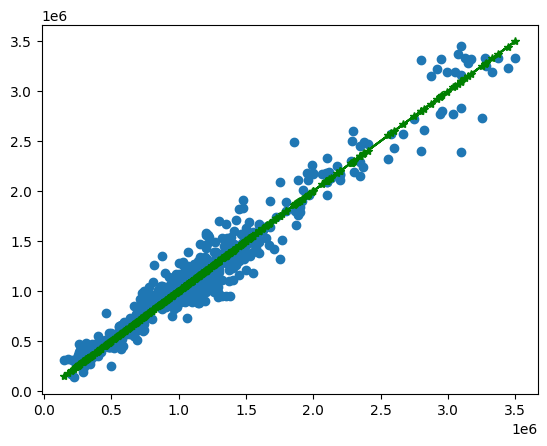

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

In [ ]:
df.iloc[999]

,999
Yıl,2014.0
Kilometre,149000.0
Motor Hacmi,1598.0
Motor Gücü,136.0
Fiyat,1250000.0
...,...
Model_320i Premium,0.0
Model_320i Sport Line,0.0
Model_325i Standart,0.0
Model_328i M Sport,0.0


In [ ]:
yeniArabaSeries = df.drop("Fiyat",axis=1).iloc[999]

In [ ]:

print(yeniArabaSeries)

Yıl                        2014
Kilometre                149000
Motor Hacmi                1598
Motor Gücü                  136
Vites Tipi_Düz                0
                          ...  
Model_320i Premium            0
Model_320i Sport Line         0
Model_325i Standart           0
Model_328i M Sport            0
Model_Diğer                   0
Name: 999, Length: 89, dtype: int64


In [ ]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,89))

In [ ]:
model.predict(yeniArabaSeries)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1255367.5]], dtype=float32)

In [ ]:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 109556.75


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 22776620616.10


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Test verisi üzerinde tahmin yap
y_pred = model.predict(x_test)

# Mean Absolute Percentage Error (MAPE) hesapla
mape = mean_absolute_percentage_error(y_test, y_pred)

# MAPE'yi yüzde olarak yazdır
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

# Doğruluk yüzdesini hesapla
accuracy = 100 - (mape * 100)
print(f"Model Accuracy: {accuracy:.2f}%")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Absolute Percentage Error (MAPE): 11.19%
Model Accuracy: 88.81%


In [ ]:
from sklearn.metrics import mean_squared_error

# Test verisi üzerinde tahmin yap
y_pred = model.predict(x_test)

# Mean Squared Error hesapla
mse = mean_squared_error(y_test, y_pred)

# Ortalama gerçek değer hesapla
y_mean = np.mean(y_test)

# Normalize edilmiş MSE'yi hesapla
normalized_mse = mse / np.var(y_test)

# Yüzde olarak MSE'yi yazdır
print(f"Normalized Mean Squared Error (MSE): {normalized_mse * 100:.2f}%")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Normalized Mean Squared Error (MSE): 5.16%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 90 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Yıl                                   1599 non-null   int64  
 1   Kilometre                             1599 non-null   int64  
 2   Motor Hacmi                           1599 non-null   int64  
 3   Motor Gücü                            1599 non-null   int64  
 4   Fiyat                                 1599 non-null   float64
 5   Vites Tipi_Düz                        1599 non-null   int64  
 6   Vites Tipi_Otomatik                   1599 non-null   int64  
 7   Vites Tipi_Yarı Otomatik              1599 non-null   int64  
 8   Yakıt Tipi_Benzin                     1599 non-null   int64  
 9   Yakıt Tipi_Dizel                      1599 non-null   int64  
 10  Yakıt Tipi_LPG & Benzin               1599 non-null   int64  
 11  Kasa Tipi_Cabrio 